In [221]:
from math import comb
from numpy import random
import matplotlib.pyplot as plt

Recall that the PMF of a $binomial(n,p)$ random variable $X$ is given by: $$P(X = i) =  {n \choose i} p^{i}(1-p)^{n-i}$$

The code below gives the CDF of the binomial distribution. That is, it retuns $P(X \leq k)$ for a $binomial(n,p)$ random variable

In [149]:
def binCDF(n,p,k):
    return sum(comb(n, i) * ((p)**i) * (1-p) ** (n-i) for i in range(0, k+1))

In [170]:
binCDF(100, 1/2, 50)

0.5397946186935894

In the lecture, we claimed that the correct rejection region for an $\alpha$ value of $.01$ was $\{x : x \leq 36 \text{ or } x \geq 64\}$. Let's confirm this! Recall that $P(X > k) = 1-P(X \leq k)$. 

In [173]:
binCDF(100, 1/2, 36) + (1-binCDF(100,1/2, 63))

0.006637120515926129

In [175]:
binCDF(100, 1/2, 37) + (1-binCDF(100,1/2, 62))

0.012032975725363458

Let's also confirm that our value of $\alpha$ is about right experimentally. The following code runs the experiment and counts the number of false positives. If we run the experiment $1000$ times we should expect about $6$ or $7$ false positives.  

In [197]:
experiment = random.default_rng()
falsePos = 0
for i in range(1000):
        X = experiment.binomial(100,1/2)
        if X >= 64 or X <= 36:
            falsePos += 1
falsePos


5

Now lets experimentally approximate $\beta$ in the experiements as $p$ goes from $.55$ to $.90$ in increments of $.025$.

In [229]:
probabilities = [.55+.025*i for i in range(0,15)]
falseNegatives = []
experiment = random.default_rng()
for p in probabilities:
    falseNeg = 0
    for i in range(1000):
            X = experiment.binomial(100,p)
            if X < 64:
                falseNeg += 1
    falseNegatives.append(falseNeg)
estimatedBetas = [negs/1000 for negs in falseNegatives]

Finally, lets plot the results using matplotlib.

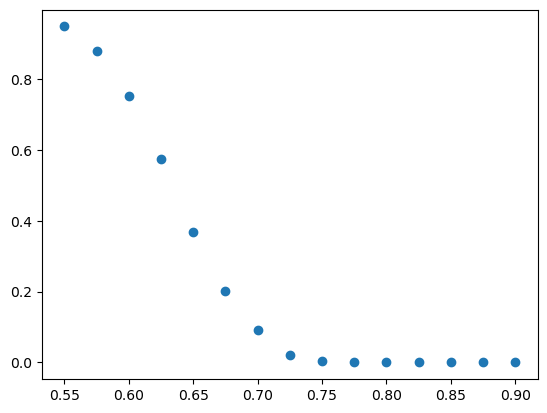

In [230]:
plt.scatter(probabilities, estimatedBetas)
plt.show()